# Data Files

In [45]:
#Raw PATRIC download
#Downloaded from https://www.bv-brc.org/view/SpecialtyGeneList/?and(keyword(%22blaL1%22)

f = open("BLAL1_proteins.fasta", "r")
file_contents_raw = f.read()
print(file_contents_raw)
f.close()

>fig|1537778.3.peg.2038|IMX13_04215| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas sp. B2 | 1537778.3]
MRNAADEAHASFCASSQRTFTMRSFLPALVLAVAVPPLHAAEPPLPQLRAYTVDASWLQP
MRPLQIADHTWQIGTENLTALLVQTDDGAVLIDGGMPQMADHLLANLQQRGVAPQQLRWI
LLSHAHADHAGAVAELKRRTGAQIASNAETAVLLARGGSNDLHFGDDITFPPANADRILM
DGEVVSLGGMHFTAHFMPGHTPGSTAWTWNDTRDGRPVRIAYADSLSAPGYRLQGNPRYP
HLIEDYRRSFATVRRLPCDVLLTPHPGASGWDYAAGAKASAAAMRCSAYADSAERSFEAQ
LARERDNAH
>fig|2045214.10.peg.227|JJW18_01100| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas lactitubi strain As-5 | 2045214.10]
MRLQTLAITLAALLPAAASAAEPPLPQLRAYTVDASWLQPMAPLQIADHTWQIGTEDLTA
LLVQTPQGAVLLDGGMPQMADHLLRNMKARGVAQQDLRLILLSHAHADHAGPVAALKRGT
GAQIVANAESAVLLARGGSNDLHFGDGITYPPANADRIIMDGEVVTVGGIDFTAHFMPGH
TPGSTAWTWTDTRDGTPVRIVYADSLSAPGYQLRDNPRYPHLIDDYRRSFATVRALPCDI
LLTPHPGASNWNYSAGAKAGAKALTCKAYADEAEKKFDAQLAKEAAGAR
>fig|2045214.8.peg.3998|JJW19_05865| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas lactitubi s

In [44]:
#Aligned with MUSCLE v5
f = open("BLAL1_proteins_aligned.fasta", "r")
file_contents_aligned = f.read()
print(file_contents_aligned)
f.close()

>fig|2599307.3.peg.1529|FQS62_02035| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas sp. SBJS02 | 2599307.3]
-------------------------MRFTLLAFALAVALPAAHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQIADHT
WQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-SHLISNMKVRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA
--NAESAVLLA------RGGSNDLHFADGITYPPASADRIIMDGEAVTVGGITFTAHFMPGH----------TPGSTAWT
WTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFTTVRGL------------------PCD-LLLTPHP
GASNWNYAAGSKASANALTCSAYADAAEKKFDAQLAKE-T---AG--DR
>fig|40324.1699.peg.3411|D7T54_03050| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas maltophilia strain OC322 | 40324.1699]
M----K----EAHASFWASFKRTWIMRFTLLAFALAVALPAVHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQVADHT
WQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-GHLLDNMKLRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA
--NAETAVLLA------RGGSNDLHFGDGITYPPASADRIIMDGEVVTVGGIAFTAHFMPGH----------TPGSTAWT
WTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFATVRAL------------------PCD-LLLTPHP
GASNWNYAVGSKASAEALTCNA

# FASTA Parser

In [1]:
def parse_fasta_file(input_file):
    """Return a dict of {id:gene_seq} pairs based on the sequences in the input FASTA file
    input_file -- a file handle for an input fasta file
    """
    parsed_L1_seqs = {}
    curr_seq_id = None
    curr_seq = []

    for line in f:
        line = line.strip()

        if line.startswith(">"):
            if curr_seq_id is not None:
                parsed_L1_seqs[curr_seq_id] = ''.join(curr_seq)

            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    #Add the final sequence to the dict
    parsed_L1_seqs[curr_seq_id] = ''.join(curr_seq)
    return parsed_L1_seqs


#Normally this would be determined
#by user input via argparse. Hard-coded for now
input_file = 'BLAL1_proteins_aligned.fasta'

f = open(input_file)
parsed_L1_seqs = parse_fasta_file(input_file)
print(parsed_L1_seqs)

{'fig|2599307.3.peg.1529|FQS62_02035| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas sp. SBJS02 | 2599307.3]': '-------------------------MRFTLLAFALAVALPAAHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQIADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-SHLISNMKVRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAESAVLLA------RGGSNDLHFADGITYPPASADRIIMDGEAVTVGGITFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFTTVRGL------------------PCD-LLLTPHPGASNWNYAAGSKASANALTCSAYADAAEKKFDAQLAKE-T---AG--DR', 'fig|40324.1699.peg.3411|D7T54_03050| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas maltophilia strain OC322 | 40324.1699]': 'M----K----EAHASFWASFKRTWIMRFTLLAFALAVALPAVHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQVADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-GHLLDNMKLRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAETAVLLA------RGGSNDLHFGDGITYPPASADRIIMDGEVVTVGGIAFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFATVRAL------------------PCD-LLLTPHPGASNWNYAVGSKASAEALTCN

## Retrieve a Column

In [2]:
def retrieve_column(example_seq_dict,column_index):
    '''Retrieves a column from a dictionary of multiple sequence alignment sequences'''
    
    result = []
    for gene_id,seq in example_seq_dict.items():
        residue = seq[column_index]
        result.append(residue)
    return result

In [3]:
#Loop over all sequences and ids
for id,seq in parsed_L1_seqs.items():
    print(id,seq)

fig|2599307.3.peg.1529|FQS62_02035| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas sp. SBJS02 | 2599307.3] -------------------------MRFTLLAFALAVALPAAHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQIADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-SHLISNMKVRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAESAVLLA------RGGSNDLHFADGITYPPASADRIIMDGEAVTVGGITFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFTTVRGL------------------PCD-LLLTPHPGASNWNYAAGSKASANALTCSAYADAAEKKFDAQLAKE-T---AG--DR
fig|40324.1699.peg.3411|D7T54_03050| Subclass B3 beta-lactamase (EC 3.5.2.6) => L1 family [Stenotrophomonas maltophilia strain OC322 | 40324.1699] M----K----EAHASFWASFKRTWIMRFTLLAFALAVALPAVHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQVADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-GHLLDNMKLRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAETAVLLA------RGGSNDLHFGDGITYPPASADRIIMDGEVVTVGGIAFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFATVRAL------------------PCD-LLLTPHPGASNWNYAVGSKASAEALTCNAYADAAEKKFD

In [4]:
#Testing function
index_0 = retrieve_column(parsed_L1_seqs,column_index=0)
print(index_0)

['-', 'M', 'M', 'M', '-', 'M', '-', 'M', 'M', '-', '-', 'M', '-', '-', '-', 'M', '-', '-', '-', 'M', '-', 'M', 'M', '-', 'M', 'M', '-', '-', '-', '-', '-', '-', 'M', 'M', '-', '-', '-', 'M', 'M', '-', '-', '-', 'M', '-', 'M', 'M', 'M', 'M', '-', 'M', 'M', 'M', '-', 'M', '-', '-', 'M', 'M', '-', 'M', '-', '-', '-', '-', '-', '-', 'M', '-', 'M', 'M', '-', '-', 'M', 'M', 'M', '-', 'M', 'M', '-', '-', 'M', '-', '-', '-', '-', '-', '-', '-', '-', 'M', '-', 'M', 'M', '-', '-', '-', 'M', 'M', 'M', 'M', '-', '-', 'M', '-', '-', 'M', '-', '-', 'M', '-', '-', 'M', '-', '-', 'M', 'M', '-', '-', '-', '-', 'M', '-', '-', '-', 'M', '-', 'M', 'M', 'M', 'M', '-', 'M', '-', 'M', 'M', '-', 'M', 'M', 'M', 'M', 'M', 'M', 'M', '-', '-', 'M', 'M', '-', 'M', '-', '-', '-', 'M', '-', 'M', '-', 'M', '-', '-', 'M', '-', '-', '-', '-', 'M', '-', '-', 'M', '-', '-', 'M', 'M', 'M', 'M', 'M', '-', '-', 'M', '-', '-', '-', 'M', 'M', 'M', '-', '-', '-', '-', '-', 'M', '-', '-', 'M', 'M', '-', '-', '-', '-', 'M', '-',

In [5]:
#Creating a defined value for the sequences list
all_L1_values=list(parsed_L1_seqs.values())
print(all_L1_values)

['-------------------------MRFTLLAFALAVALPAAHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQIADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-SHLISNMKVRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAESAVLLA------RGGSNDLHFADGITYPPASADRIIMDGEAVTVGGITFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFTTVRGL------------------PCD-LLLTPHPGASNWNYAAGSKASANALTCSAYADAAEKKFDAQLAKE-T---AG--DR', 'M----K----EAHASFWASFKRTWIMRFTLLAFALAVALPAVHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQVADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-GHLLDNMKLRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAETAVLLA------RGGSNDLHFGDGITYPPASADRIIMDGEVVTVGGIAFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFATVRAL------------------PCD-LLLTPHPGASNWNYAVGSKASAEALTCNAYADAAEKKFDAQLARE-T---AG--TR', 'M----K----EAHASFWASFKRTWIMRFTLLAFALAVALPAVHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQVADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-GHLLDNMKLRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAETAVLLA------RGGSNDLHFGDGITYPPASADRIIMDGEVVTVGGIAFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVR

In [6]:
#Get length of a dictionary
sequence_amount = len(all_L1_values)
print(f"There are {sequence_amount} sequences in my dataset.")

There are 532 sequences in my dataset.


In [7]:
#Counting the amount of residues
first=all_L1_values[0]
print("The first sequence is:",first)

The first sequence is: -------------------------MRFTLLAFALAVALPAAHAS--AAEAPL-PQ-LRAYTVDASWLQPMAPLQIADHTWQIGTEDLTALLVQTA--EGAVLLDGGMPQM-A-SHLISNMKVRGVAPQDLRLILLSHAHADHAGPVAELKRRTGAHVAA--NAESAVLLA------RGGSNDLHFADGITYPPASADRIIMDGEAVTVGGITFTAHFMPGH----------TPGSTAWTWTDTRDG-KPVRIAYADSLSAPGYQLKGNPR--YPRLIEDYKRSFTTVRGL------------------PCD-LLLTPHPGASNWNYAAGSKASANALTCSAYADAAEKKFDAQLAKE-T---AG--DR


In [8]:
n_columns=len(first)
print(f"There are {n_columns} residues.")

There are 369 residues.


# Amino Acid Composition

In [9]:
def amino_acid_composition(amino_acid_seq):
    '''Counts up how many amino acids are within a column.'''
    
    #Checking to see what amino acids are present in an amino acid sequence
    amino_acids_present=set(amino_acid_seq)
    
    #Creating a dictionary to store information
    column_result_dict={}
    
    #For loop to count amino acids
    for amino_acid in amino_acids_present:
        amino_acid_count=amino_acid_seq.count(amino_acid)
        
        #Stores information into a dictionary 
        column_result_dict[amino_acid]=amino_acid_count
    
    return column_result_dict

    print(column_result_dict)

In [10]:
#Testing the function
example_seq=retrieve_column(parsed_L1_seqs,column_index=0)
amino_acid_composition(example_seq)

{'-': 310, 'M': 222}

In [22]:
#Viewing data of amino acids based on the column and storing it in a dictionary
composition_by_column={}
for column_index in range(n_columns):
    print("The current column is:",column_index)
    current_column = retrieve_column(parsed_L1_seqs,column_index)
    amino_acid_results = amino_acid_composition(current_column)
    composition_by_column[column_index]=amino_acid_results
print(composition_by_column)

The current column is: 0
The current column is: 1
The current column is: 2
The current column is: 3
The current column is: 4
The current column is: 5
The current column is: 6
The current column is: 7
The current column is: 8
The current column is: 9
The current column is: 10
The current column is: 11
The current column is: 12
The current column is: 13
The current column is: 14
The current column is: 15
The current column is: 16
The current column is: 17
The current column is: 18
The current column is: 19
The current column is: 20
The current column is: 21
The current column is: 22
The current column is: 23
The current column is: 24
The current column is: 25
The current column is: 26
The current column is: 27
The current column is: 28
The current column is: 29
The current column is: 30
The current column is: 31
The current column is: 32
The current column is: 33
The current column is: 34
The current column is: 35
The current column is: 36
The current column is: 37
The current column is:

In [12]:
#Just messing around with ways to get out nested dictionary values
for residue_position, residues_present in composition_by_column.items():
    print(f"Residue Position: {residue_position}")
    for residue, residue_amount in residues_present.items():
        print(f"Residue: {residue}, Amount: {residue_amount}")

Residue Position: 0
Residue: -, Amount: 310
Residue: M, Amount: 222
Residue Position: 1
Residue: R, Amount: 6
Residue: -, Amount: 526
Residue Position: 2
Residue: T, Amount: 4
Residue: N, Amount: 2
Residue: -, Amount: 526
Residue Position: 3
Residue: V, Amount: 6
Residue: -, Amount: 526
Residue Position: 4
Residue: V, Amount: 3
Residue: -, Amount: 526
Residue: M, Amount: 3
Residue Position: 5
Residue: K, Amount: 104
Residue: R, Amount: 8
Residue: -, Amount: 413
Residue: G, Amount: 3
Residue: E, Amount: 4
Residue Position: 6
Residue: N, Amount: 8
Residue: -, Amount: 524
Residue Position: 7
Residue: A, Amount: 8
Residue: -, Amount: 524
Residue Position: 8
Residue: T, Amount: 4
Residue: A, Amount: 4
Residue: -, Amount: 524
Residue Position: 9
Residue: D, Amount: 8
Residue: -, Amount: 524
Residue Position: 10
Residue: G, Amount: 3
Residue: E, Amount: 116
Residue: -, Amount: 413
Residue Position: 11
Residue: A, Amount: 116
Residue: -, Amount: 413
Residue: P, Amount: 3
Residue Position: 12
R

# Shannon Entropy Calculations

In [13]:
#Written by ChatGTP and modified by me

def shannon_entropy(alignment):
    '''Calculates Shannon Entropy using mulitiple sequence alignment data.
    Values must be in list format for this to work.'''
    
    import math
    
    #Creates an empty dictionary
    entropy_values = {}
    
    #Sets the alignment length
    alignment_length = len(alignment[0])

    #Count up all of the amino acids 
    for position in range(alignment_length):
        counts = {}
        total_sequences = len(alignment)
        for sequence in alignment:
            residue = sequence[position]
            counts[residue] = counts.get(residue, 0) + 1

        #Calculate the entropy based on the counts
        entropy = 0
        for count in counts.values():
            probability = count / total_sequences
            entropy += probability * math.log2(probability)

        #Create a dictionary to store results
        entropy_values[position]=(-entropy)
    
    return entropy_values

In [14]:
#Viewing the entropy data and defining a list

L1_entropy_dict = shannon_entropy(all_L1_values)
L1_entropy_values = list(L1_entropy_dict.values())
print(L1_entropy_values)

[0.9801717438381496, 0.08915242916269714, 0.09950914909564249, 0.08915242916269714, 0.10043062465141894, 0.9301512693638437, 0.1125875994003927, 0.1125875994003927, 0.1276251933853551, 0.1125875994003927, 0.8048128017921806, 0.8048128017921806, 0.8322119255140187, 0.8048128017921806, 0.8048128017921806, 0.8048128017921806, 0.8837563078093682, 0.7565818374156771, 0.8048128017921806, 1.5605950535796607, 1.5027032126528026, 0.9801717438381496, 1.444038290596745, 1.5370234115354735, 1.5045809427896684, 0.7549105540754462, 0.8516379942144846, 1.8928112230188785, 2.2097187768256865, 1.5572914938541582, 1.7476619210482807, 1.2175832124594523, 1.815683536317669, 0.6921374466796307, 0.7855756621525617, 1.6300305854907156, 1.858340094962327, 1.6735319062323764, 0.7633295759030864, 1.2231282069119798, 2.2211751136587945, 2.1622813667858063, 1.7970797373316947, 1.8253832115772708, 1.9560178652832234, 0.8996598819990189, 1.0106029170169835, 1.2562747633722058, 0.5300735246370457, 1.9295926218684376

In [25]:
print(L1_entropy_dict)

{0: 0.9801717438381496, 1: 0.08915242916269714, 2: 0.09950914909564249, 3: 0.08915242916269714, 4: 0.10043062465141894, 5: 0.9301512693638437, 6: 0.1125875994003927, 7: 0.1125875994003927, 8: 0.1276251933853551, 9: 0.1125875994003927, 10: 0.8048128017921806, 11: 0.8048128017921806, 12: 0.8322119255140187, 13: 0.8048128017921806, 14: 0.8048128017921806, 15: 0.8048128017921806, 16: 0.8837563078093682, 17: 0.7565818374156771, 18: 0.8048128017921806, 19: 1.5605950535796607, 20: 1.5027032126528026, 21: 0.9801717438381496, 22: 1.444038290596745, 23: 1.5370234115354735, 24: 1.5045809427896684, 25: 0.7549105540754462, 26: 0.8516379942144846, 27: 1.8928112230188785, 28: 2.2097187768256865, 29: 1.5572914938541582, 30: 1.7476619210482807, 31: 1.2175832124594523, 32: 1.815683536317669, 33: 0.6921374466796307, 34: 0.7855756621525617, 35: 1.6300305854907156, 36: 1.858340094962327, 37: 1.6735319062323764, 38: 0.7633295759030864, 39: 1.2231282069119798, 40: 2.2211751136587945, 41: 2.1622813667858063, 

In [15]:
import statistics
from statistics import mode

# Calculate the average
average_entropy = sum(L1_entropy_values) / len(L1_entropy_dict)
print("Average:", average_entropy)

# Calculate middle values
median_entropy=statistics.median(L1_entropy_values)
print("Median Entropy:", median_entropy)

#Calculate the most common
mode_entropy = mode(L1_entropy_values)
print("Mode of Entropy:", mode_entropy)

#Calculate minimum
min_entropy = min(L1_entropy_values)
print("Minimum Entropy:", min_entropy)

#Calculate maximum
max_entropy = max(L1_entropy_values)
print("Maximum Entropy:", max_entropy)

Average: 0.8803446248860703
Median Entropy: 0.8048128017921806
Mode of Entropy: 0.7204217843735464
Minimum Entropy: -0.0
Maximum Entropy: 2.5284666172961034


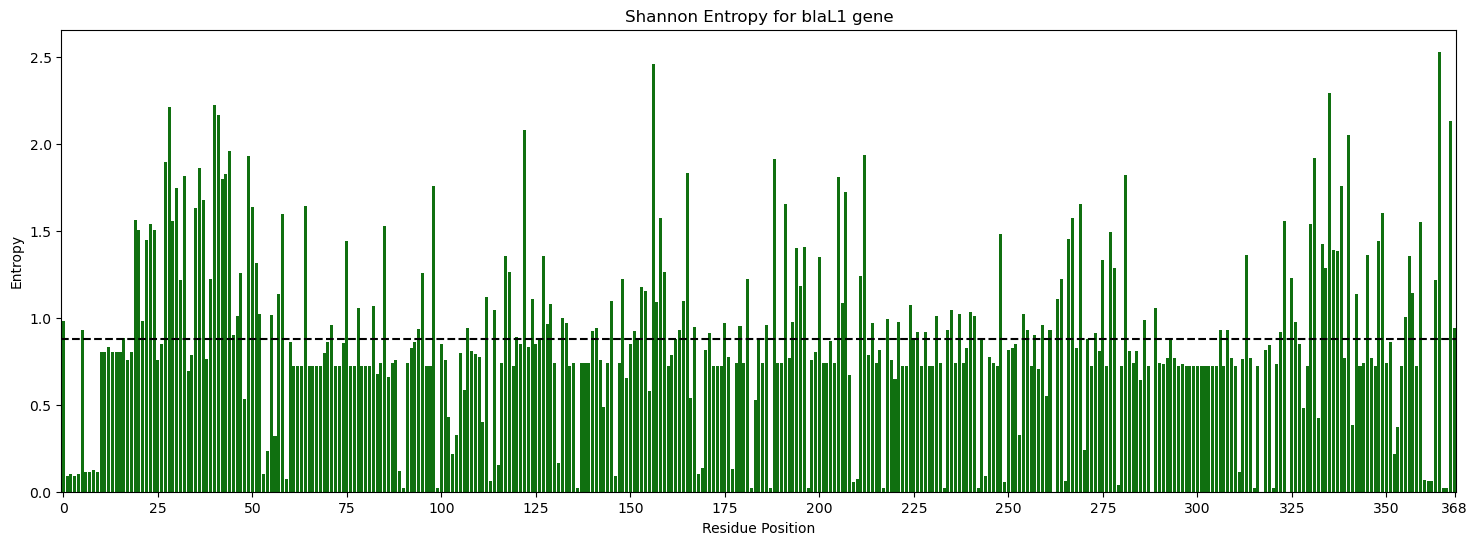

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert dictionary to lists
residue_position = list(L1_entropy_dict.keys())
entropy = list(L1_entropy_dict.values())

# Set the figure size
plt.figure(figsize=(18, 6))

# Create bar plot
sns.barplot(x=residue_position, y=entropy, color='green')

# Add labels and title
plt.xlabel("Residue Position")
plt.ylabel("Entropy")
plt.title("Shannon Entropy for blaL1 gene")

# Plot the dashed line for the average
plt.axhline(y=average_entropy, color='black', linestyle='--', label="Average")

# Set the x-axis tick locations and labels
tick_locations = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 368]  # Specify the tick locations
tick_labels = [str(tick) for tick in tick_locations]  # Convert tick locations to strings

plt.xticks(tick_locations, tick_labels)  # Set the tick locations and labels

# Show the plot
plt.show()

# Amino Acid Side Chain

In [17]:
#Written by ChatGTP and modified by me

def amino_acid_position_characteristics(alignment):
    '''This code combs through an alignment and counts up the amino acids at each
    poision by side chain characteristics rather than just the amino acid itself.
    Must be a list containing values.'''
    
    #Dictionary containing amino acid categories
    amino_acid_categories = {
        "non_polar_aliphatic": ["G", "A", "V", "L", "I", "M", "F"],
        "non_polar_aromatic": ["P", "Y", "W"],
        "polar_uncharged": ["S", "T", "N", "Q", "C"],
        "pos_charged": ["H", "K", "R"],
        "neg_charged": ["D", "E"],
        "indel": ["-"]
    }

    #Empty dictionary
    residue_characteristics = {}

    #Combs through each residue and counts the occurance of amino acids to their respected categories
    for position in range(len(alignment[0])):
        position_counts = {category: 0 for category in amino_acid_categories}
        position_counts["indel"] = 0
        for sequence in alignment:
            residue = sequence[position]
            if residue == "-":
                position_counts["indel"] += 1
            else:
                for category, residues in amino_acid_categories.items():
                    if residue in residues:
                        position_counts[category] += 1

        #Dictionary to store results in
        residue_characteristics[position] = position_counts

    return residue_characteristics

In [18]:
L1_residue_characteristics=amino_acid_position_characteristics(all_L1_values)
print(L1_residue_characteristics)

{0: {'non_polar_aliphatic': 222, 'non_polar_aromatic': 0, 'polar_uncharged': 0, 'pos_charged': 0, 'neg_charged': 0, 'indel': 310}, 1: {'non_polar_aliphatic': 0, 'non_polar_aromatic': 0, 'polar_uncharged': 0, 'pos_charged': 6, 'neg_charged': 0, 'indel': 526}, 2: {'non_polar_aliphatic': 0, 'non_polar_aromatic': 0, 'polar_uncharged': 6, 'pos_charged': 0, 'neg_charged': 0, 'indel': 526}, 3: {'non_polar_aliphatic': 6, 'non_polar_aromatic': 0, 'polar_uncharged': 0, 'pos_charged': 0, 'neg_charged': 0, 'indel': 526}, 4: {'non_polar_aliphatic': 6, 'non_polar_aromatic': 0, 'polar_uncharged': 0, 'pos_charged': 0, 'neg_charged': 0, 'indel': 526}, 5: {'non_polar_aliphatic': 3, 'non_polar_aromatic': 0, 'polar_uncharged': 0, 'pos_charged': 112, 'neg_charged': 4, 'indel': 413}, 6: {'non_polar_aliphatic': 0, 'non_polar_aromatic': 0, 'polar_uncharged': 8, 'pos_charged': 0, 'neg_charged': 0, 'indel': 524}, 7: {'non_polar_aliphatic': 8, 'non_polar_aromatic': 0, 'polar_uncharged': 0, 'pos_charged': 0, 'neg

In [19]:
#Written by ChatGTP and modified by me

def plot_category_counts(residue_characteristics):
    '''Plots the categories of amino acids at each residue
    in a multiple sequence alignment file, with separate graphs for each category'''
    
    import matplotlib.pyplot as plt
    
    #Establish categories and colors for graphs
    categories = ["non_polar_aliphatic", "non_polar_aromatic", "polar_uncharged", "pos_charged", "neg_charged", "indel"]
    colors = ["blue", "red", "green", "brown", "purple", "gray"]

    #Sets the x,y according to their respected categories and colors
    for category, color in zip(categories, colors):
        x = list(range(len(residue_characteristics)))
        y = [residue_characteristics[position][category] for position in x]

        #Graph customiazation
        plt.figure(figsize=(15,9))
        plt.plot(x, y, color=color, linewidth=1)
        plt.xlabel("Position", size=20)
        plt.ylabel(f"Count of Amino Acids - {category}", size=20)
        plt.title(f"Amino Acid Category Counts at Each Position - {category}", size=25)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.tight_layout()

    plt.show()

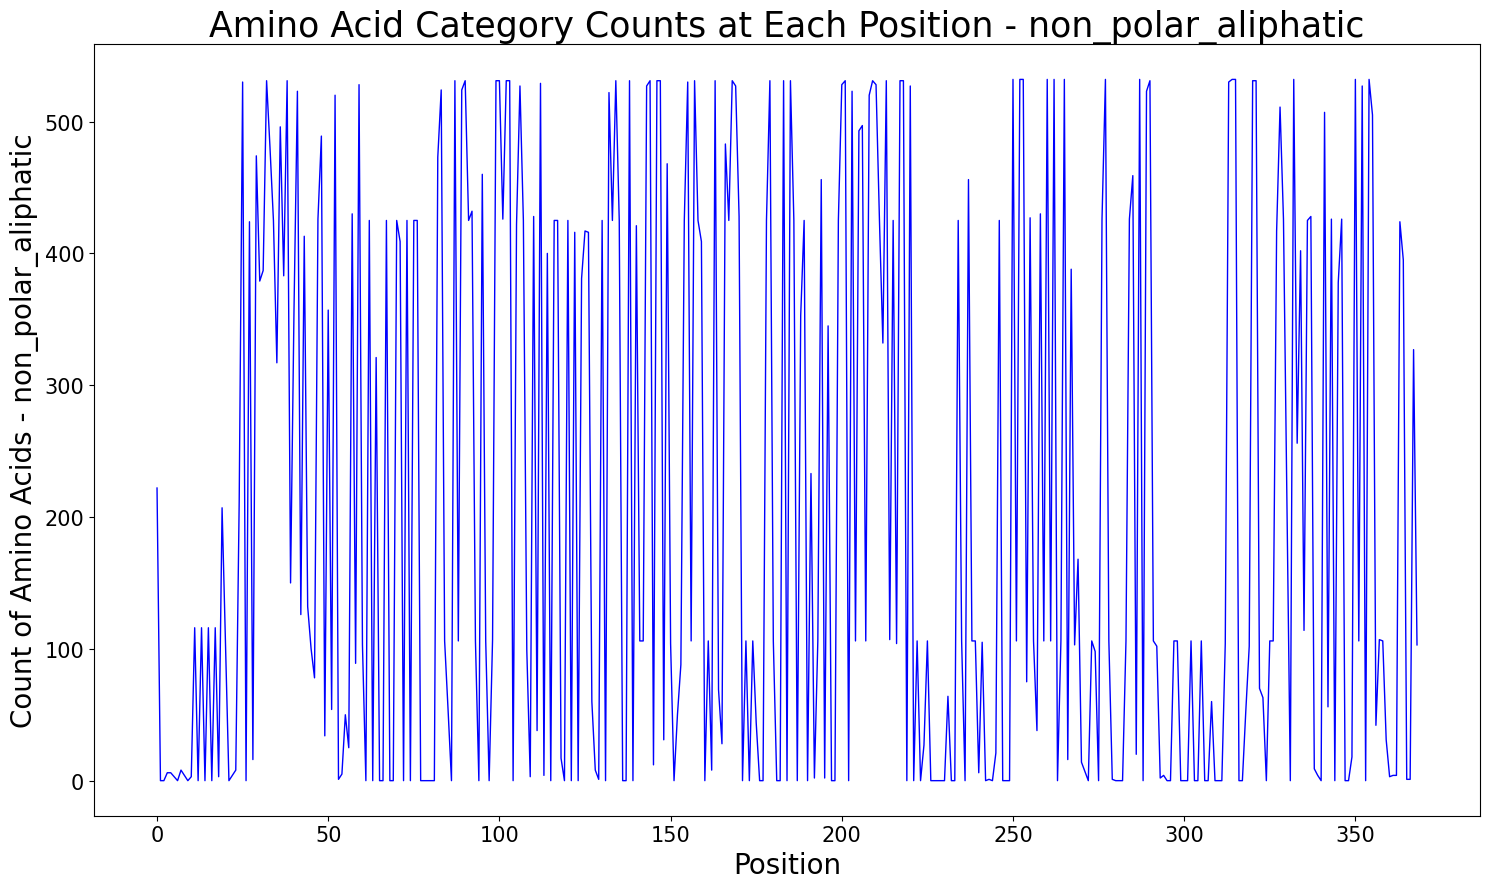

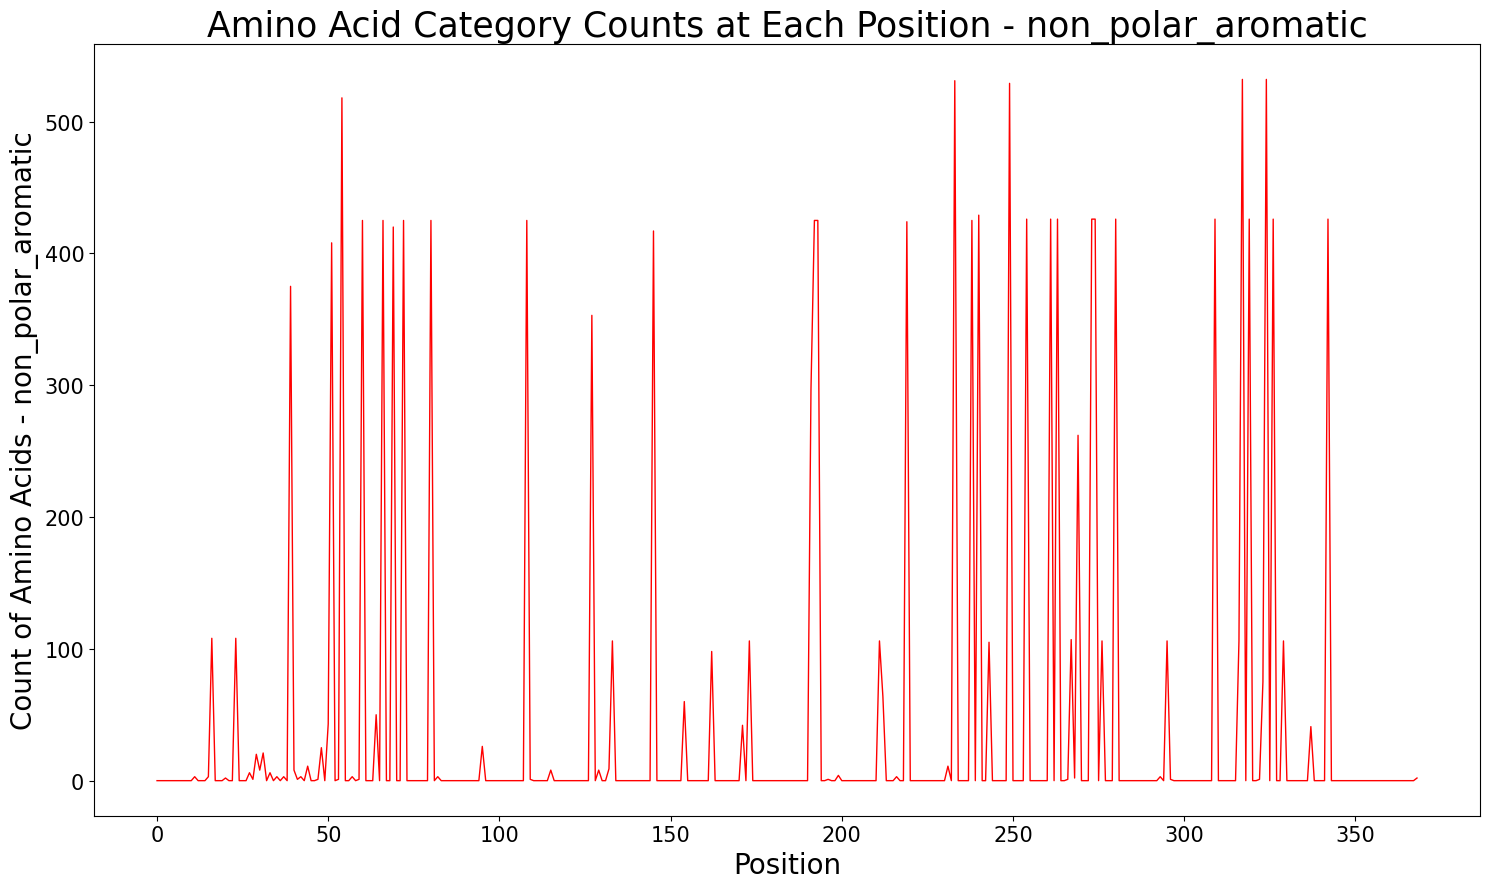

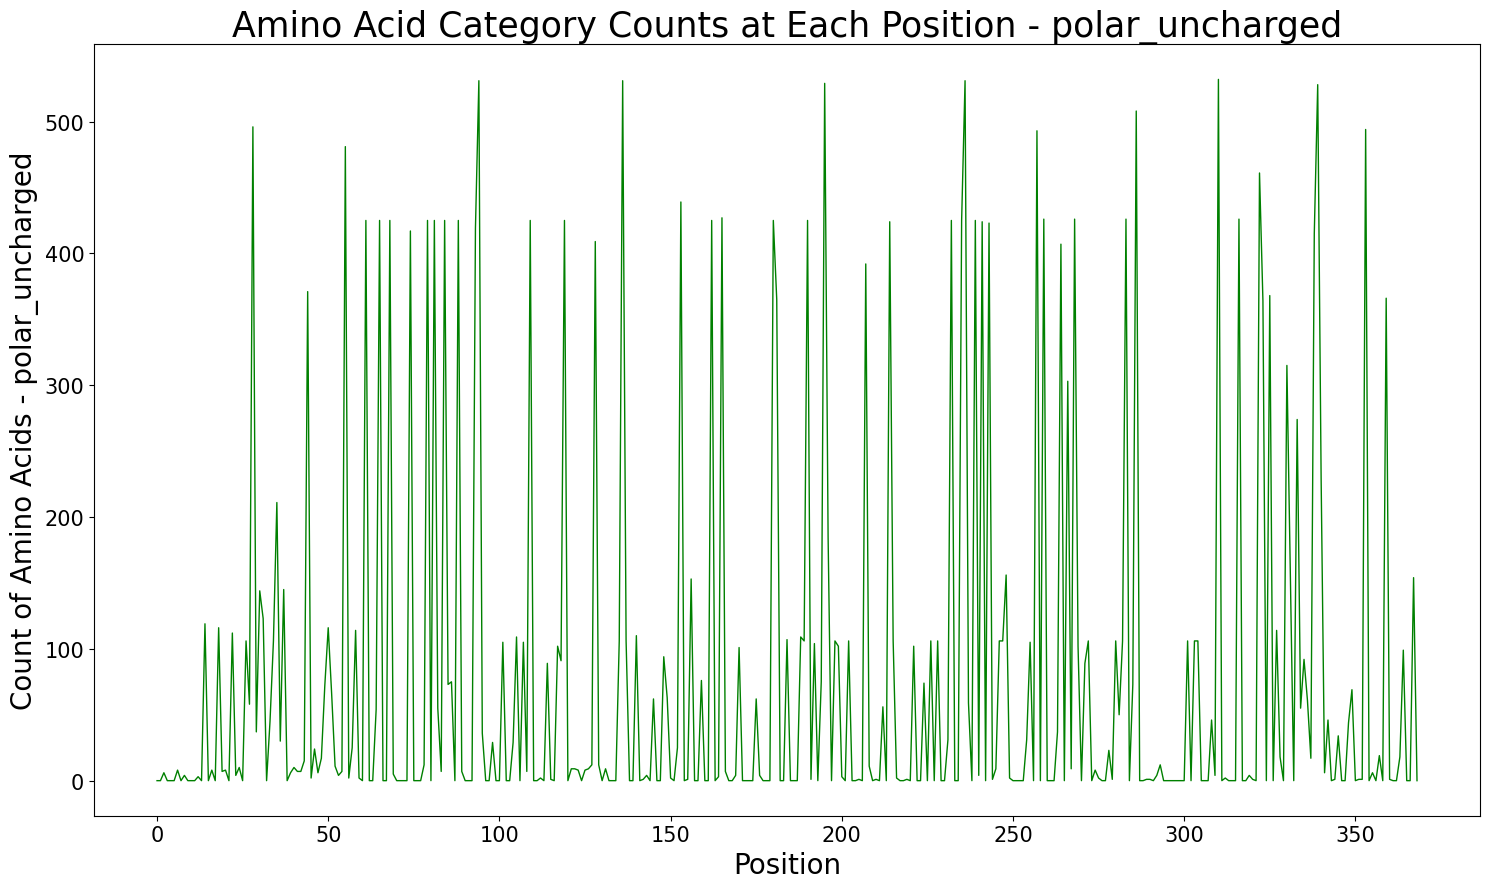

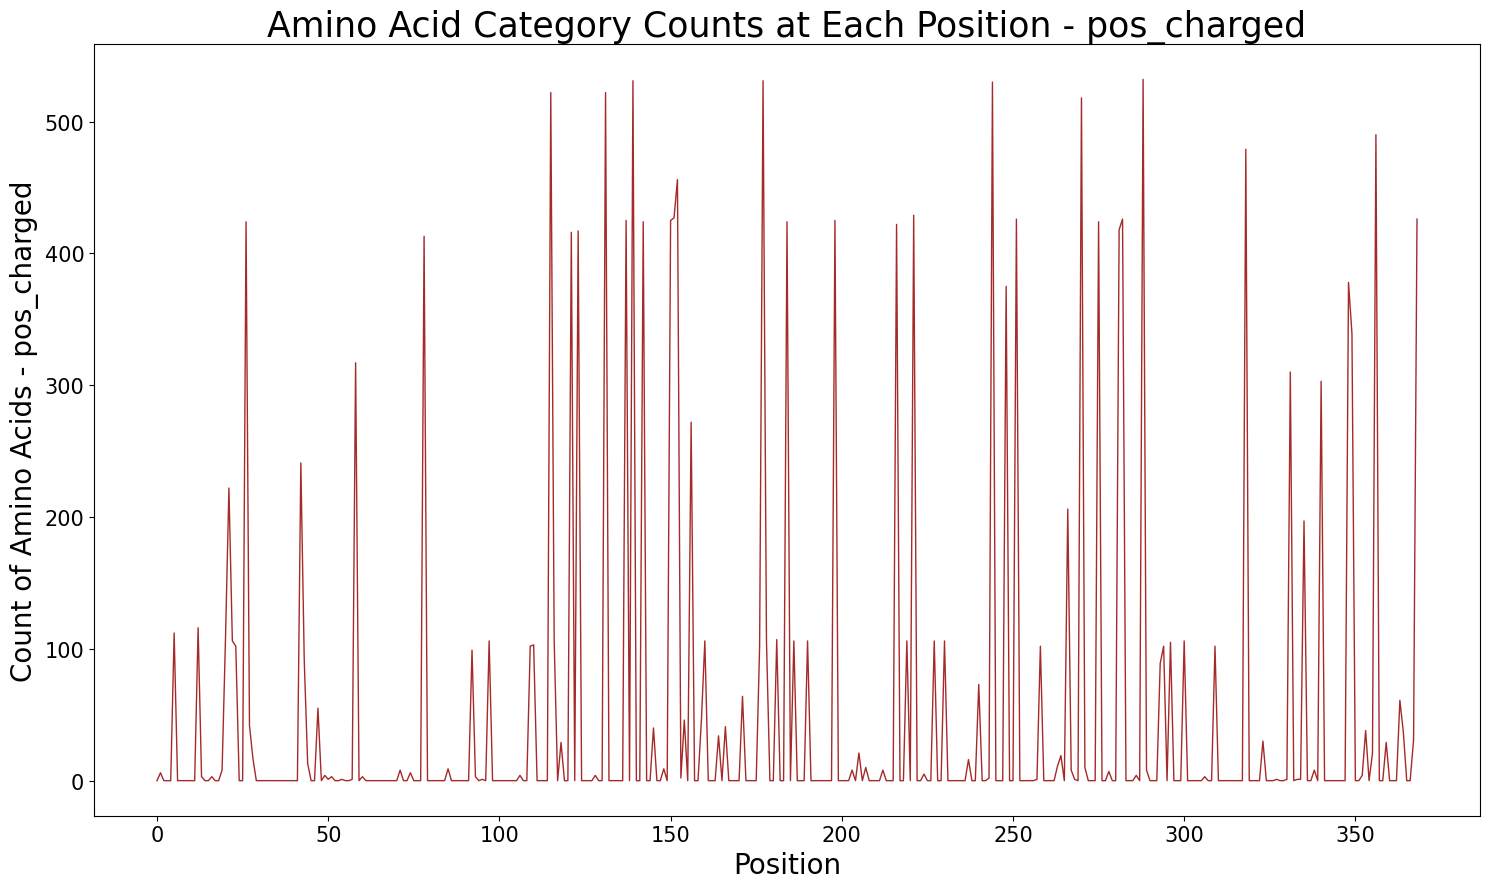

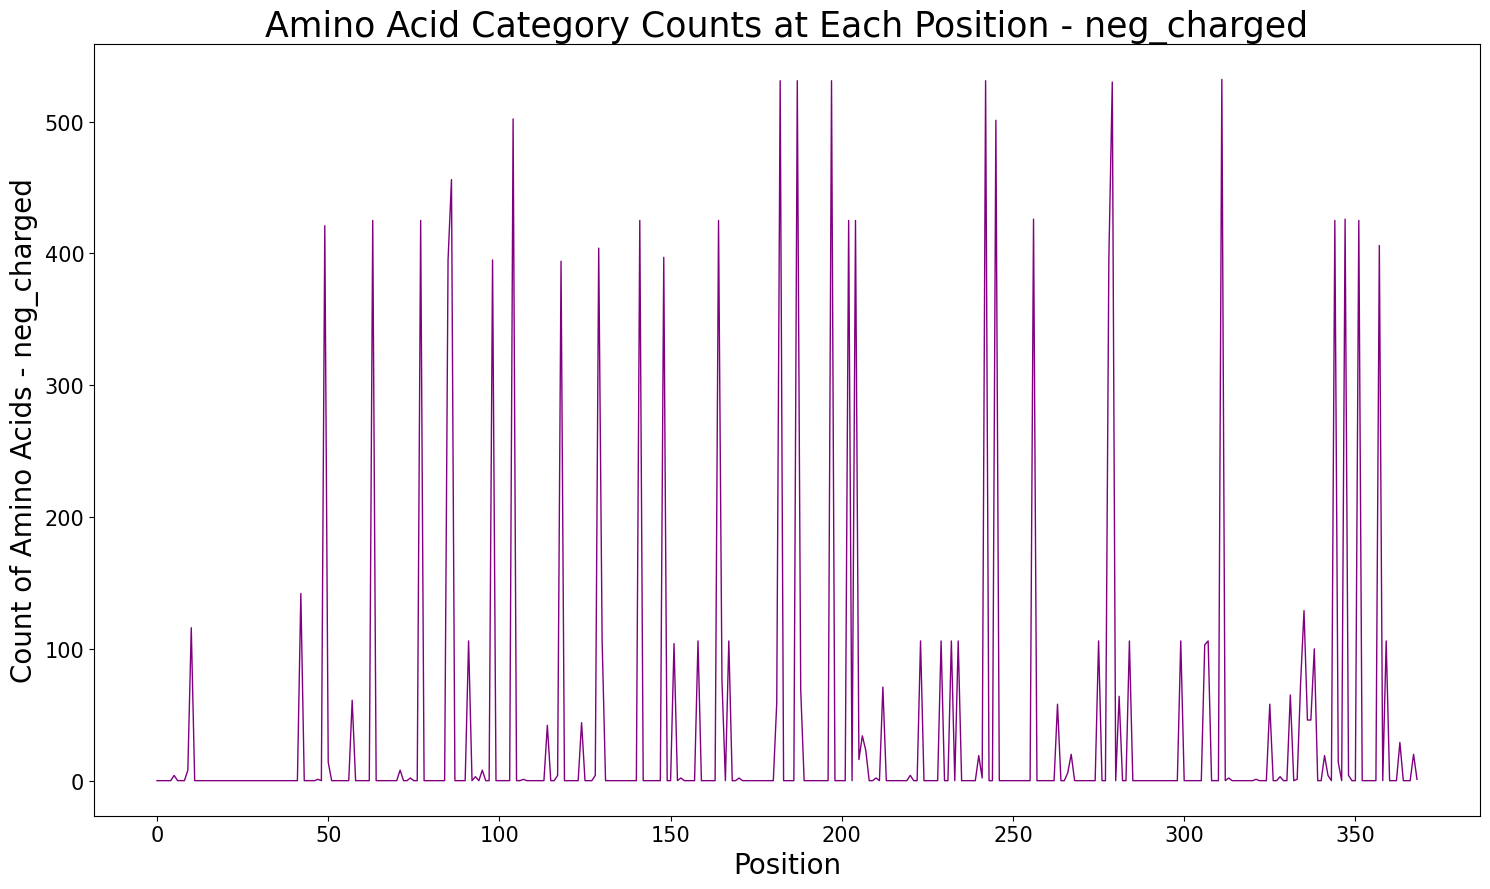

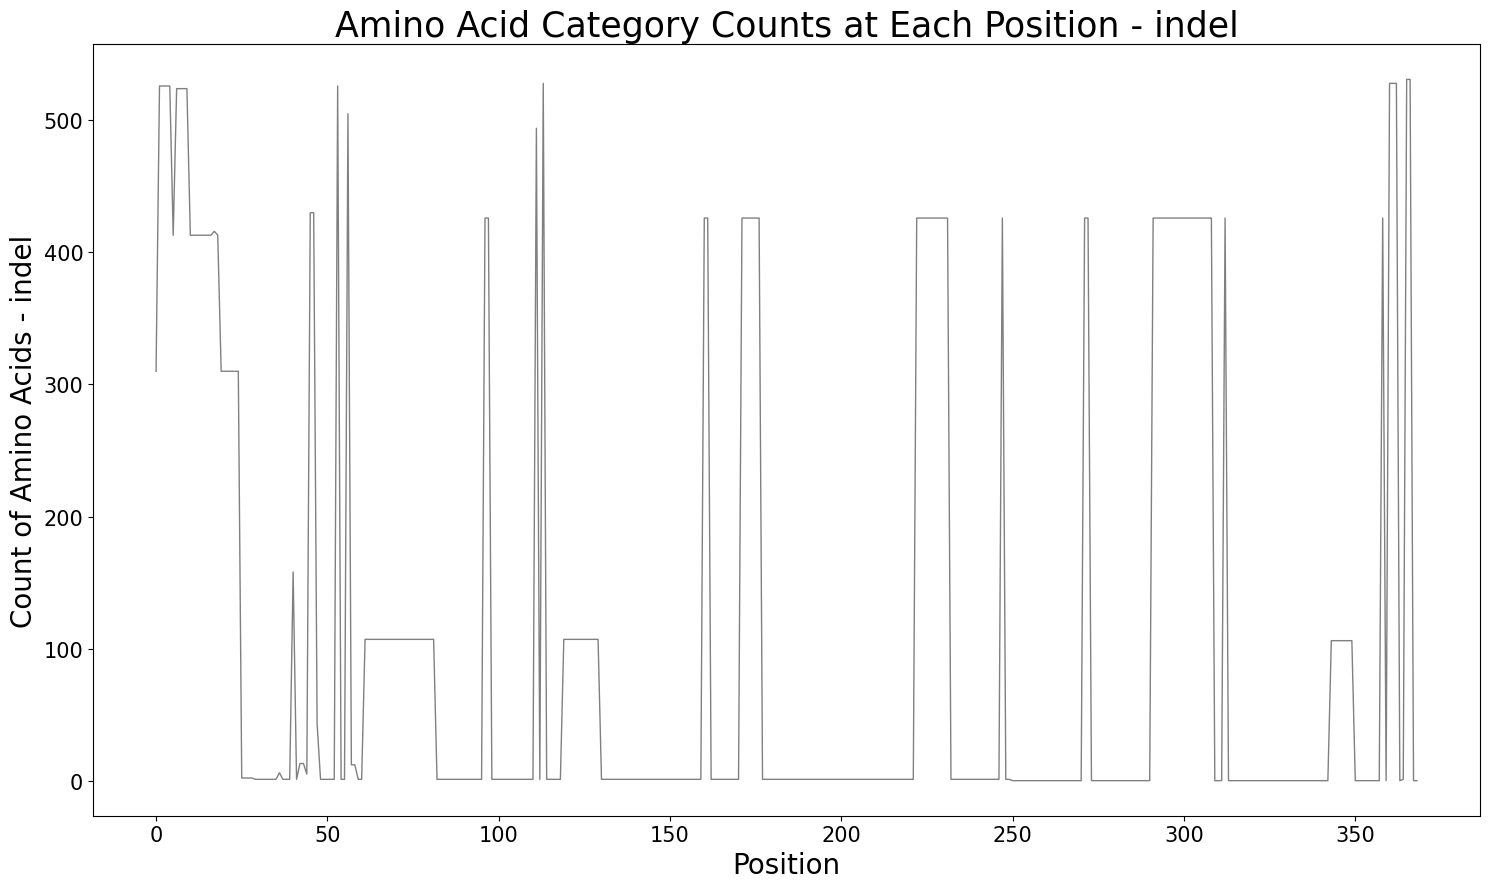

In [20]:
plot_category_counts(L1_residue_characteristics)